# Instalando as Bibliotecas

In [11]:
!pip install pycaret
!pip install Numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importando as Bibliotecas

In [2]:
import pandas as pd
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Importando a Base de Dados

In [3]:
from google.colab import files
uploaded = files.upload()

Saving base_big_data_bet.xlsx to base_big_data_bet.xlsx


In [4]:
df = pd.read_excel("base_big_data_bet.xlsx");

In [5]:
df = df[['B365CH','B365CD','B365CA','AHCh','B365CAHH']]
df.columns = ['Odd_H','Odd_D','Odd_A','Linha_HA','Odd_HA']
flt = df.Linha_HA == -0.25
df = df[flt]
df = df[['Odd_H','Odd_D','Odd_A','Odd_HA']]
# Ajustando o Índice do DataFrame
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº'])
df = df.rename(index=lambda x: x + 1)
df.head()

,Odd_H,Odd_D,Odd_A,Odd_HA
Nº,,,,
1,2.37,3.4,2.8,2.05
2,2.10,3.5,3.4,1.88
3,2.37,3.0,3.3,2.00
4,2.37,3.1,3.1,2.05
5,2.45,3.1,3.0,2.05


In [6]:
len(df)

1467

In [7]:
df1 = df.loc[df.index <= 1460]
len(df1)

1460

In [8]:
df2 = df.loc[(df.index <= 1465) & (df.index > 1460)]
len(df2)

5

In [9]:
df3 = df.loc[(df.index <= 1467) & (df.index > 1465)]
len(df3)

2

# Pycaret

In [12]:
# Importando a Biblioteca de Regressão
from pycaret.regression import *
setup(data= df1, target='Odd_HA', session_id=123)

,Description,Value
0,session_id,123
1,Target,Odd_HA
2,Original Data,"(1460, 4)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1019, 3)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Odd_HA',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

(-1,       Odd_H  Odd_D  Odd_A
 Nº                       
 1      2.37    3.4    2.8
 2      2.10    3.5    3.4
 3      2.37    3.0    3.3
 4      2.37    3.1    3.1
 5      2.45    3.1    3.0
 ...     ...    ...    ...
 1456   2.00    3.6    3.5
 1457   2.30    3.4    3.0
 1458   2.10    3.5    3.5
 1459   2.25    3.5    3.0
 1460   2.05    3.6    3.5
 
 [1457 rows x 3 columns], [<pandas.io.formats.style.Styler at 0x7f2069c4be50>], [('Setup Config',
                                  Description             Value
   0                               session_id               123
   1                                   Target            Odd_HA
   2                            Original Data         (1460, 4)
   3                           Missing Values              True
   4                         Numeric Features                 3
   5                     Categorical Features                 0
   6                         Ordinal Features             False
   7                High Cardinal

In [13]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [14]:
top3 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0328,0.0017,0.0411,0.8529,0.0140,0.0170,0.331
lar,Least Angle Regression,0.0328,0.0017,0.0411,0.8529,0.0140,0.0170,0.017
br,Bayesian Ridge,0.0328,0.0017,0.0411,0.8529,0.0140,0.0170,0.013
huber,Huber Regressor,0.0328,0.0017,0.0411,0.8529,0.0140,0.0170,0.049
ridge,Ridge Regression,0.0331,0.0017,0.0415,0.8500,0.0142,0.0171,0.016
gbr,Gradient Boosting Regressor,0.0335,0.0019,0.0429,0.8393,0.0146,0.0173,0.066
lightgbm,Light Gradient Boosting Machine,0.0352,0.0020,0.0448,0.8261,0.0153,0.0182,0.111
ada,AdaBoost Regressor,0.0360,0.0022,0.0463,0.8143,0.0158,0.0187,0.074
omp,Orthogonal Matching Pursuit,0.0377,0.0022,0.0469,0.8098,0.0160,0.0195,0.016
rf,Random Forest Regressor,0.0368,0.0022,0.0471,0.8080,0.0160,0.0190,0.575


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     jitter=None, n_nonzero_coefs=500, normalize=True, precompute='auto',
     random_state=123, verbose=False), BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)]
INFO:logs:compare_models() succesfully completed......................................


In [15]:
print(top3)

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     jitter=None, n_nonzero_coefs=500, normalize=True, precompute='auto',
     random_state=123, verbose=False), BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)]


In [16]:
# Criando o Modelo
lr = create_model('lr', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0354,0.0018,0.0429,0.8236,0.0147,0.0185
1,0.0340,0.0018,0.0422,0.8654,0.0144,0.0176
2,0.0339,0.0017,0.0407,0.8410,0.0139,0.0176
3,0.0326,0.0016,0.0400,0.8716,0.0137,0.0169
4,0.0343,0.0018,0.0420,0.8669,0.0143,0.0176
5,0.0301,0.0014,0.0370,0.8782,0.0126,0.0156
6,0.0263,0.0011,0.0336,0.9009,0.0115,0.0136
7,0.0385,0.0029,0.0535,0.7433,0.0181,0.0198
8,0.0326,0.0016,0.0404,0.8783,0.0138,0.0169


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


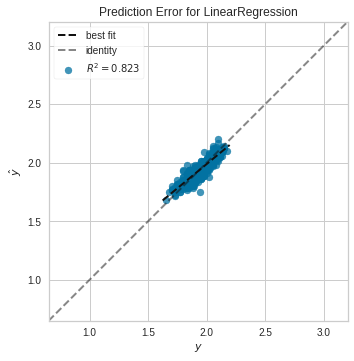

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
# Grafico de Erro
plot_model(lr, plot='error')

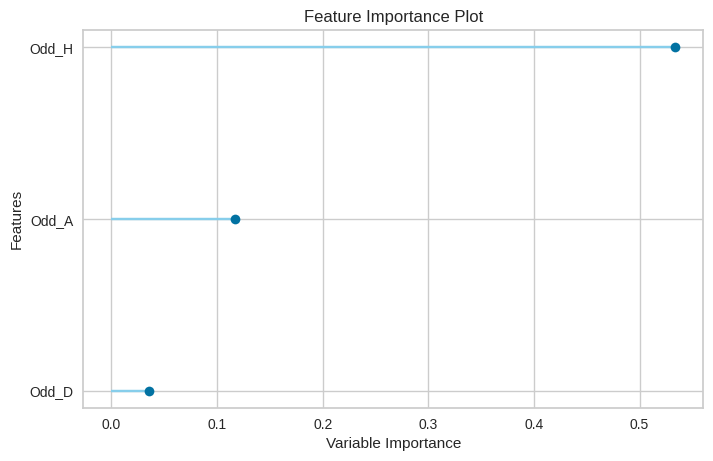

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
# Variáveis Mais Importantes
plot_model(lr, plot='feature')

In [19]:
# Testando com Dados de Treinameto
predict_model(lr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0347,0.002,0.0444,0.8234,0.0152,0.018


,Odd_H,Odd_D,Odd_A,Odd_HA,Label
0,2.30,3.40,3.00,2.02,2.020109
1,2.45,3.25,2.90,2.08,2.117195
2,2.45,3.00,3.25,2.10,2.085240
3,2.15,3.50,3.30,1.87,1.901445
4,2.05,3.80,3.10,1.88,1.860727
...,...,...,...,...,...
433,2.30,3.10,3.40,1.95,1.984100
434,2.25,3.25,2.90,2.02,2.010470
435,2.20,3.30,3.40,1.93,1.923591
436,2.30,3.30,3.25,2.00,1.994477


In [20]:
# Finalizando o Modelo
final_lr = finalize_model(lr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Decla

In [21]:
# Previsão
prev = predict_model(final_lr, data = df2)
prev

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0362,0.0017,0.0413,0.8422,0.0137,0.0179


,Odd_H,Odd_D,Odd_A,Odd_HA,Label
Nº,,,,,
1461,2.20,3.60,3.1,1.96,1.948611
1462,2.15,3.25,3.5,1.87,1.887177
1463,2.25,3.30,3.1,1.93,1.986599
1464,2.30,3.80,2.8,2.09,2.029517
1465,2.45,3.30,2.9,2.15,2.114844


In [22]:
# Salvando o Modelo para Utilizar com Dados Novos
save_model(final_lr, 'Linear Regression Pycaret')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), model_name=Linear Regression Pycaret, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Odd_HA',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Odd_HA',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Odd_HA')),
                 ('fix_perfect', Remove_100(target='Odd_HA')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
          

In [23]:
#Reutilizando o modelo
saved_final_lr = load_model('Linear Regression Pycaret')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Linear Regression Pycaret, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [24]:
#Prevendo novo dado
nova_previsao = predict_model(saved_final_lr, data = df3)
nova_previsao

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Odd_HA',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Odd_HA')),
                ('fix_perfect', Remove_100(target='Odd_HA')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0093,0.0001,0.0095,0.7721,0.0032,0.0046


,Odd_H,Odd_D,Odd_A,Odd_HA,Label
Nº,,,,,
1466,2.25,3.6,3.0,1.98,1.986892
1467,2.30,3.4,3.1,2.02,2.008390
